Importamos librerías para importar archivos, realizar ajustes y graficar.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from scipy.optimize import curve_fit

Cambiamos el estilo de los gráficos, importamos el archivo con datos de la galaxia y extraemos los parámetros a graficar.

In [2]:
plt.style.use('ggplot')

galaxy= ascii.read('radialProfile.dat')
x=galaxy['col1']
y=galaxy['col2']

Definimos la función con la que ajustaremos los datos anteriores (en este caso el Sersic Profile)

In [3]:
def sersic_model(r,a,r_eff,n):
    bn = 2*n-(1/3) 
    return a*np.exp(-bn*((r/r_eff)**(1/n)-1))

Obtenemos los valores de las constantes que se ajustan a nuestra curva, y generamos un nuevo parámetro x para poder gráficar el ajuste

In [4]:
fit= curve_fit(sersic_model, x, y)
ans, cov= fit
fit_a, fit_b, fit_c= ans
x2= np.linspace(x[0], x[-1] ,200)

Por último agregamos la línea que demarca nuestro radio mayor de apertura, y graficamos los datos y el ajuste a la vez.

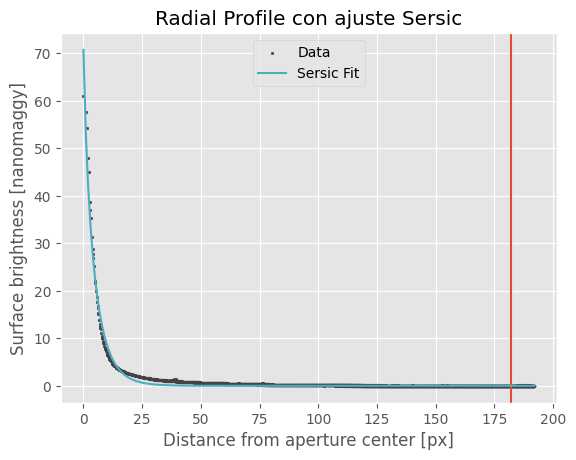

In [5]:
plt.axvline(x=182, ymin=0, ymax=72)
plt.scatter(x, y, s=3, color='#444444', label='Data')
plt.plot(x2, sersic_model(x2, fit_a, fit_b, fit_c), c='#4DADC0', label='Sersic Fit')
plt.xlabel('Distance from aperture center [px]')
plt.ylabel('Surface brightness [nanomaggy]')
plt.title('Radial Profile con ajuste Sersic')
plt.legend(loc= 'best')
plt.show()